In [1]:
import pandas as pd
import numpy as np
import json
import emoji
import matplotlib.pyplot as plt
import re
import nltk
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
def read_data():
    
    with open('instances.jsonl','r') as f:
        instances = []
        for line in f:
        
            instances.append(json.loads(line))
    with open('truth.jsonl', 'r') as f:
        labels = []
        for line in f:
            labels.append(json.loads(line))
    df = pd.DataFrame(instances)
    df = df.set_index('id')
    labels = pd.DataFrame(labels)
    labels = labels.set_index('id')
    df['label']  = 0
    df['label'][labels['truthClass'] == 'clickbait'] = 1
    df['truthJudgments'] = labels.truthJudgments
    df['postText'] = df['postText'].apply(lambda x: x[0])
    return df

In [3]:
df = read_data()
df.head()

C:\Users\yangt\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,postMedia,postText,postTimestamp,targetCaptions,targetDescription,targetKeywords,targetParagraphs,targetTitle,label,truthJudgments
id,,,,,,,,,,
858462320779026433,[],UK’s response to modern slavery leaving victim...,Sat Apr 29 23:25:41 +0000 2017,[modern-slavery-rex.jpg],“Inexcusable” failures in the UK’s system for ...,"modern slavery, Department For Work And Pensio...",[Thousands of modern slavery victims have not ...,‘Inexcusable’ failures in UK’s response to mod...,0,"[0.3333333333, 0.0, 0.3333333333, 0.0, 0.0]"
858421020331560960,[],this is good,Sat Apr 29 20:41:34 +0000 2017,"[In this July 1, 2010 file photo, Dr. Charmain...",President Donald Trump has appointed pro-life ...,"Americans United for Life, Dr. Charmaine Yoest...",[President Donald Trump has appointed the pro-...,Donald Trump Appoints Pro-Life Advocate as Ass...,1,"[1.0, 1.0, 1.0, 1.0, 1.0]"
858368123753435136,[],"The ""forgotten"" Trump roast: Relive his brutal...",Sat Apr 29 17:11:23 +0000 2017,[President Trump will not attend this year's W...,President Trump won't be at this year's White ...,"trump whcd, whcd, white house correspondents d...",[When the White House correspondents’ dinner i...,The ‘forgotten’ Trump roast: Relive his brutal...,0,"[0.3333333333, 1.0, 0.3333333333, 0.0, 0.66666..."
858323428260139008,[],Meet the happiest #dog in the world!,Sat Apr 29 14:13:46 +0000 2017,"[Maru , Maru, Maru, Maru, Maru]","The article is about Maru, a husky dog who has...","Maru, husky, dogs, pandas, furball, instagram",[Adorable is probably an understatement. This ...,"Meet The Happiest Dog In The World, Maru The H...",1,"[1.0, 0.6666666666, 1.0, 1.0, 1.0]"
858283602626347008,[],Tokyo's subway is shut down amid fears over an...,Sat Apr 29 11:35:31 +0000 2017,[All nine lines of Tokyo's subway system were ...,"The temporary suspension, which lasted ten min...","Tokyo,subway,shut,fears,North,Korean,attack",[One of Tokyo's major subways systems says it ...,Tokyo's subway is shut down amid fears over an...,0,"[0.0, 0.0, 0.0, 0.0, 0.0]"


has emoji for CB:  0.018273471959672338
has emoji for nonCB:  0.018745347499492453
-------------------------------------------------------
emoji count for CB:  0.004749805023589879
emoji count for nonCB:  0.001996293077462871
-------------------------------------------------------


C:\Users\yangt\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


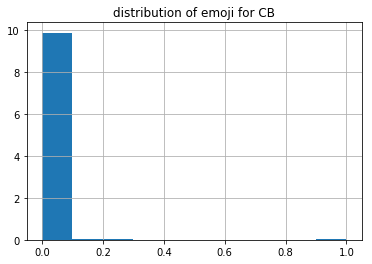

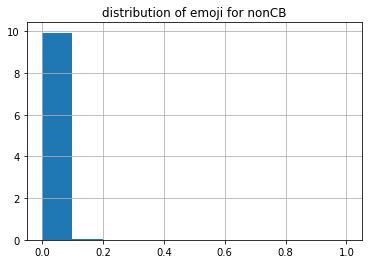

In [4]:
def emoji_ana(df):
    def contains_emoji(string):
        tokenizer = nltk.tokenize.TweetTokenizer()

        for w in tokenizer.tokenize(string):
          
        
            if w in emoji.UNICODE_EMOJI:
                    
                return 1
        return 0
    def count_emoji(string):
        tokenizer = nltk.tokenize.TweetTokenizer()
        if len(string)==0:return 0
        c = 0
        tokens = tokenizer.tokenize(string)
        for w in tokenizer.tokenize(string):
          
            
            if w in emoji.UNICODE_EMOJI:
                    
                c+=1
        return c/len(tokens)
    cblens = df['postText'][df['label']==1].apply(contains_emoji)
    noncblens =  df['postText'][df['label']==0].apply(contains_emoji)
    
    print('has emoji for CB: ',cblens.mean())
    print('has emoji for nonCB: ', noncblens.mean())
    print('-------------------------------------------------------')
    
    cblens = df['postText'][df['label']==1].apply(count_emoji)
    noncblens =  df['postText'][df['label']==0].apply(count_emoji)
    print('emoji count for CB: ',cblens.mean())
    print('emoji count for nonCB: ', noncblens.mean())
    print('-------------------------------------------------------')
    
    plt.figure()
    cblens.hist(normed = True)
    plt.title('distribution of emoji for CB')
  #  plt.yscale('log')
    plt.show()
    
    plt.figure()
    noncblens.hist(normed = True)
   # plt.yscale('log')
    plt.title('distribution of emoji for nonCB')
    plt.show()

    
emoji_ana(df)

C:\Users\yangt\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


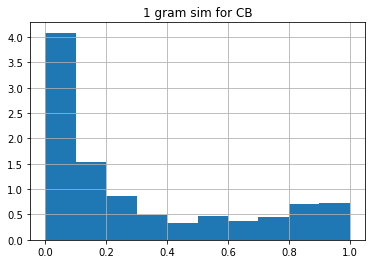

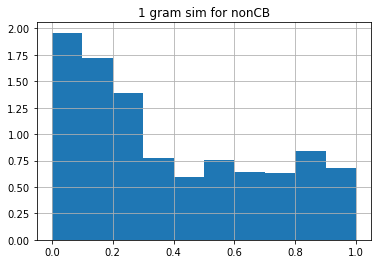

1 gram sim for CB:  0.29941812460727174
1 gram sim for nonCB:  0.3896704902572348
-------------------------------------------------------


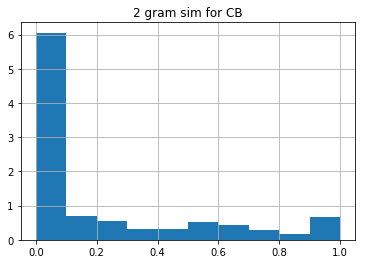

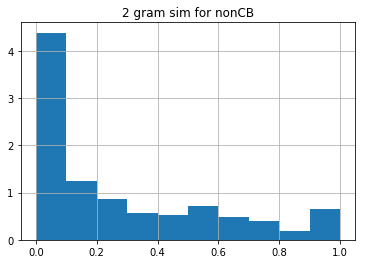

2 gram sim for CB:  0.2144367568317382
2 gram sim for nonCB:  0.27162227148701257
-------------------------------------------------------


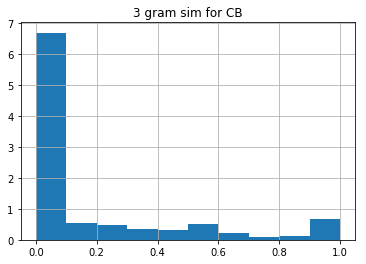

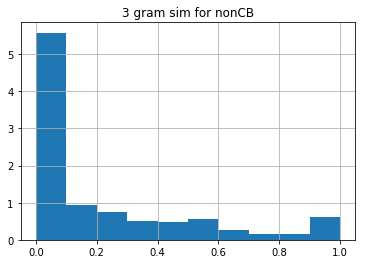

3 gram sim for CB:  0.17461118075035978
3 gram sim for nonCB:  0.21146462872336186
-------------------------------------------------------


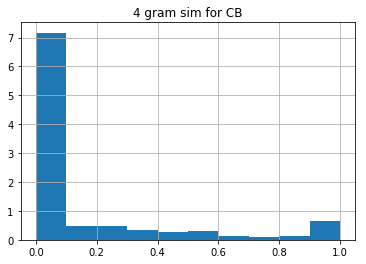

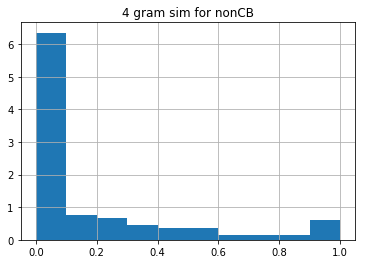

4 gram sim for CB:  0.15074363907295213
4 gram sim for nonCB:  0.17659051741618667
-------------------------------------------------------


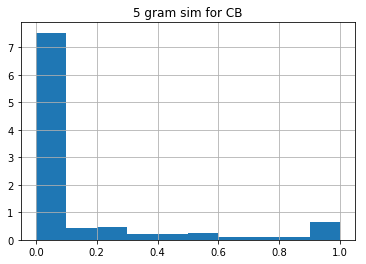

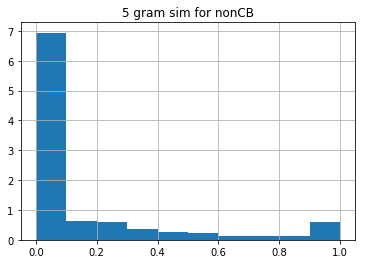

5 gram sim for CB:  0.13355870418989424
5 gram sim for nonCB:  0.15170796823678842
-------------------------------------------------------


In [5]:
# jaccard text similariy of title vs tweet
def ngram_sim_ana(df):
    lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()
    tokenizer = nltk.tokenize.TweetTokenizer()
    def tweet_lemmatize(tweet):
        # lemmatiz the tweets
        tokens = tokenizer.tokenize(tweet)
        tokens = [lemmatizer.lemmatize(t) for t in tokens if t not in emoji.UNICODE_EMOJI]
        
        return tokens
    def tw_ttl_sims(title, tweet, n =1):
        '''jaccard distance between title and tweet'''
        
        #trivial case
        if len(title)==0 or len(tweet) ==0:return 0
        tw_tokens = tweet_lemmatize(tweet)
        ttl_tokens = tokenizer.tokenize(title)
        
        #trivial case
        if len(tw_tokens)==0 or len(ttl_tokens) ==0:return 0
        
        #if n exceed bounds of either the title or the tweet
        if len(tw_tokens) <n or len(ttl_tokens) <n: n = min(len(tw_tokens), len(ttl_tokens))
        
        tw_ngram = set(nltk.ngrams(tw_tokens, n))
        ttl_ngram = set(nltk.ngrams(ttl_tokens, n))
        inter = tw_ngram.intersection(ttl_ngram)
        return len(inter)/(len(tw_ngram)+len(ttl_ngram)-len(inter))

    #1 gram
    cblens = df[df['label']==1].apply(lambda row: tw_ttl_sims(row['targetTitle'], row['postText'],n=1 ), axis = 1)
    noncblens =  df[df['label']==0].apply(lambda row: tw_ttl_sims(row['targetTitle'], row['postText'],n=1 ), axis = 1)
    plt.figure()
    cblens.hist(normed = True)
    plt.title('1 gram sim for CB')
    plt.show()
    
    plt.figure()
    noncblens.hist(normed = True)
    plt.title('1 gram sim for nonCB')
    plt.show()
    print('1 gram sim for CB: ',cblens.mean())
    print('1 gram sim for nonCB: ', noncblens.mean())
    print('-------------------------------------------------------')
    
    #2 gram
    cblens = df[df['label']==1].apply(lambda row: tw_ttl_sims(row['targetTitle'], row['postText'],n=2 ), axis = 1)
    noncblens =  df[df['label']==0].apply(lambda row: tw_ttl_sims(row['targetTitle'], row['postText'],n=2 ), axis = 1)
    plt.figure()
    cblens.hist(normed = True)
    plt.title('2 gram sim for CB')
    plt.show()
    
    plt.figure()
    noncblens.hist(normed = True)
    plt.title('2 gram sim for nonCB')
    plt.show()
    print('2 gram sim for CB: ',cblens.mean())
    print('2 gram sim for nonCB: ', noncblens.mean())
    print('-------------------------------------------------------')
    
    #3gram
    cblens = df[df['label']==1].apply(lambda row: tw_ttl_sims(row['targetTitle'], row['postText'],n=3 ), axis = 1)
    noncblens =  df[df['label']==0].apply(lambda row: tw_ttl_sims(row['targetTitle'], row['postText'],n=3 ), axis = 1)
    plt.figure()
    cblens.hist(normed = True)
    plt.title('3 gram sim for CB')
    plt.show()
    
    plt.figure()
    noncblens.hist(normed = True)
    plt.title('3 gram sim for nonCB')
    plt.show()

    print('3 gram sim for CB: ',cblens.mean())
    print('3 gram sim for nonCB: ', noncblens.mean())
    print('-------------------------------------------------------')
    
    #4gram
    cblens = df[df['label']==1].apply(lambda row: tw_ttl_sims(row['targetTitle'], row['postText'],n=4 ), axis = 1)
    noncblens =  df[df['label']==0].apply(lambda row: tw_ttl_sims(row['targetTitle'], row['postText'],n=4 ), axis = 1)
    plt.figure()
    cblens.hist(normed = True)
    plt.title('4 gram sim for CB')
    plt.show()
    
    plt.figure()
    noncblens.hist(normed = True)
    plt.title('4 gram sim for nonCB')
    plt.show()

    print('4 gram sim for CB: ',cblens.mean())
    print('4 gram sim for nonCB: ', noncblens.mean())
    print('-------------------------------------------------------')
    
    #5gram
    cblens = df[df['label']==1].apply(lambda row: tw_ttl_sims(row['targetTitle'], row['postText'],n=5 ), axis = 1)
    noncblens =  df[df['label']==0].apply(lambda row: tw_ttl_sims(row['targetTitle'], row['postText'],n=5 ), axis = 1)
    plt.figure()
    cblens.hist(normed = True)
    plt.title('5 gram sim for CB')
    plt.show()
    
    plt.figure()
    noncblens.hist(normed = True)
    plt.title('5 gram sim for nonCB')
    plt.show()

    print('5 gram sim for CB: ',cblens.mean())
    print('5 gram sim for nonCB: ', noncblens.mean())
    print('-------------------------------------------------------')
    
ngram_sim_ana(df)       

C:\Users\yangt\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


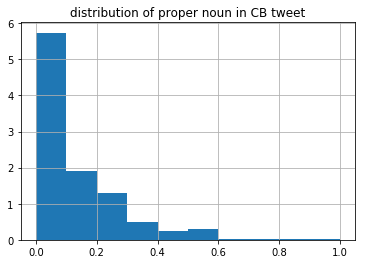

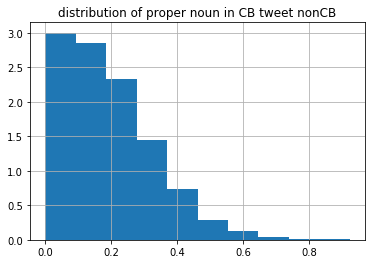

average count of proper noun for CB tweet:  0.11399392251009902
average count of proper noun for nonCB tweet:  0.19161178790865427
-------------------------------------------------------


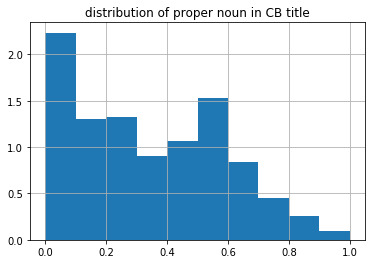

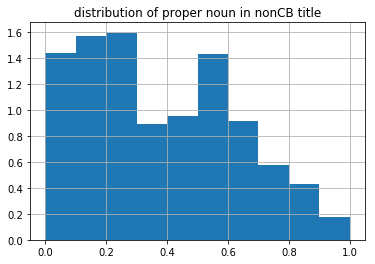

average count of proper noun for CB title:  0.3372249547796962
average count of proper noun for nonCB title:  0.37459312826086955
-------------------------------------------------------


In [6]:
# distribution of proper noun
def ana_propernoun(df):
    #distribution of proper noun in tweet and title in percentage
    tokenizer = nltk.tokenize.TweetTokenizer()
    def tweet_ana(tweet):
        if len(tweet)==0: return 0
        tokens = tokenizer.tokenize(tweet)
        if len(tokens)==0: return 0
        return len([word for word, tag in nltk.pos_tag(tokens) if tag =='NNP'])/len(tokens)
    def title_ana(title):
        if len(title)==0:return 0
        tokens = nltk.word_tokenize(title)
        if len(tokens)==0:return 0
        return len([word for word, tag in nltk.pos_tag(tokens) if tag == 'NNP'])/len(tokens)
    
    
    #tweet
    cblens = df[df['label']==1]['postText'].apply(tweet_ana)
    noncblens =  df[df['label']==0]['postText'].apply(tweet_ana)
    plt.figure()
    cblens.hist(normed = True)
    plt.title('distribution of proper noun in CB tweet')
    plt.show()
    
    plt.figure()
    noncblens.hist(normed = True)
    plt.title('distribution of proper noun in CB tweet nonCB')
    plt.show()
    print('average count of proper noun for CB tweet: ',cblens.mean())
    print('average count of proper noun for nonCB tweet: ', noncblens.mean())
    print('-------------------------------------------------------')
    
    #title
    cblens = df[df['label']==1]['targetTitle'].apply(tweet_ana)
    noncblens =  df[df['label']==0]['targetTitle'].apply(tweet_ana)
    plt.figure()
    cblens.hist(normed = True)
    plt.title('distribution of proper noun in CB title')
    plt.show()
    
    plt.figure()
    noncblens.hist(normed = True)
    plt.title('distribution of proper noun in nonCB title')
    plt.show()
    print('average count of proper noun for CB title: ',cblens.mean())
    print('average count of proper noun for nonCB title: ', noncblens.mean())
    print('-------------------------------------------------------')
ana_propernoun(df)  

In [24]:
#extract feature from tweet and title
def feature_extract(df):
    feature_df = pd.DataFrame()
    tokenizer = nltk.tokenize.TweetTokenizer()
    lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()
    sws = set(nltk.corpus.stopwords.words('english'))
    
    #lengths
    feature_df['tw_length_in_char']=  df['postText'].apply(len)
    feature_df['tw_length_in_word'] = df['postText'].apply(lambda x: len([i for i in tokenizer.tokenize(x) if i.isalnum()]))
    feature_df['ttl_length_in_char'] = df['targetTitle'].apply(len)
    feature_df['ttl_length_in_word']= df['targetTitle'].apply(lambda x: len([i for i in tokenizer.tokenize(x) if i.isalnum()]))
    
    
    #stopwords
    def count_swp(string):
        if len(string)==0: return 0
        c = 0
        tokens = tokenizer.tokenize(string)
        for i in tokens:
            if i in sws:
                c+=1
        return c/len(tokens)
    feature_df['tw_percent_sw']= df['postText'].apply(count_swp)
    feature_df['ttl_percent_sw'] = df['targetTitle'].apply(count_swp)
    
    #punctuation
    feature_df['tw_punct'] = df['postText'].apply(lambda x:len(re.findall(r'[?!]',x)) )
    feature_df['ttl_punct'] = df['targetTitle'].apply(lambda x:len(re.findall(r'[?!]',x)) )
    
    #hashtags
    feature_df['tw_num_hash'] = df['postText'].apply(lambda x: len(re.findall(r'#\w+', x)))
    
    #sentiment
    feature_df['tw_senti'] = df['postText'].apply(lambda x: TextBlob(x).sentiment[0])
    feature_df['ttl_senti']= df['targetTitle'].apply(lambda x:TextBlob(x).sentiment[0])
    
    #subjectivity
    feature_df['tw_subj'] = df['postText'].apply(lambda x:TextBlob(x).sentiment[1])
    feature_df['ttl_subj'] = df['postText'].apply(lambda x:TextBlob(x).sentiment[1])
    
    #superlative adj
    def count_sup(string):
        for i in nltk.pos_tag(nltk.word_tokenize(string.lower())):
            if i[1] == 'JJS':return 1
        return 0
    feature_df['tw_if_super'] = df['postText'].apply(count_sup)
    feature_df['ttl_if_super'] = df['targetTitle'].apply(count_sup)
    
    #start with number
    numbers = {'one', 'two', 'three', 'four', 'five', 'six', 'nine','ten'}
    def swithnum(string):
        # the first nonstopword
        tokens = nltk.word_tokenize(string)
        
        fw = None
        for i,t in zip(tokens, nltk.pos_tag(tokens)):
            if i.lower() not in sws and not t[1].startswith('JJ'):
                fw = i
                break
        if fw and (fw.isnumeric() or fw.lower() in numbers):
            return 1
        else: return 0
    feature_df['tw_start_num'] = df['postText'].apply(swithnum)
    feature_df['ttl_start_num'] = df['targetTitle'].apply(swithnum)
    
    
    #n-gram similarity features
    def tweet_lemmatize(tweet):
        # lemmatiz the tweets
        tokens = tokenizer.tokenize(tweet)
        tokens = [lemmatizer.lemmatize(t) for t in tokens if t not in emoji.UNICODE_EMOJI]
        
        return tokens
    def tw_ttl_sims(title, tweet, n =1):
        '''jaccard distance between title and tweet'''
        
        #trivial case
        if len(title)==0 or len(tweet) ==0:return 0
        tw_tokens = tweet_lemmatize(tweet)
        ttl_tokens = [lemmatizer.lemmatize(t) for t in tokenizer.tokenize(title)]
        
        #trivial case
        if len(tw_tokens)==0 or len(ttl_tokens) ==0:return 0
        
        #if n exceed bounds of either the title or the tweet
        if len(tw_tokens) <n or len(ttl_tokens) <n: n = min(len(tw_tokens), len(ttl_tokens))
        
        tw_ngram = set(nltk.ngrams(tw_tokens, n))
        ttl_ngram = set(nltk.ngrams(ttl_tokens, n))
        inter = tw_ngram.intersection(ttl_ngram)
        return len(inter)/(len(tw_ngram)+len(ttl_ngram)-len(inter))

    feature_df['tw_ttl_sim_1gram'] = df.apply(lambda row: tw_ttl_sims(row['targetTitle'], row['postText'],n=1 ), axis = 1)
    feature_df['tw_ttl_sim_2gram'] = df.apply(lambda row: tw_ttl_sims(row['targetTitle'], row['postText'],n=2 ), axis = 1)
    feature_df['tw_ttl_sim_3gram'] = df.apply(lambda row: tw_ttl_sims(row['targetTitle'], row['postText'],n=3 ), axis = 1)
    feature_df['tw_ttl_sim_4gram'] = df.apply(lambda row: tw_ttl_sims(row['targetTitle'], row['postText'],n=4 ), axis = 1)
    feature_df['tw_ttl_sim_5gram'] = df.apply(lambda row: tw_ttl_sims(row['targetTitle'], row['postText'],n=5 ), axis = 1)
    
    #emoji distribution feature
    def count_emoji(string):
        tokenizer = nltk.tokenize.TweetTokenizer()
        
        if len(string)==0:return 0
        
        c = 0
        tokens = tokenizer.tokenize(string)
        
        for w in tokenizer.tokenize(string):
            if w in emoji.UNICODE_EMOJI:c+=1                    
        
        return c/len(tokens)
    
    feature_df['tw_emoji_pct'] = df['postText'].apply(count_emoji)
    
    #proper noun distribution feature
    def tweet_ana(tweet):
        if len(tweet)==0: return 0
        tokens = tokenizer.tokenize(tweet)
        if len(tokens)==0: return 0
        return len([word for word, tag in nltk.pos_tag(tokens) if tag =='NNP'])/len(tokens)
    def title_ana(title):
        if len(title)==0:return 0
        tokens = nltk.word_tokenize(title)
        if len(tokens)==0:return 0
        return len([word for word, tag in nltk.pos_tag(tokens) if tag == 'NNP'])/len(tokens)
    
    feature_df['tw_proper_noun_pct'] = df['postText'].apply(tweet_ana)
    feature_df['ttl_proper_noun_pct'] = df['targetTitle'].apply(title_ana)
    
    # extract features from other columns
    # post media
    feature_df['pm_has_media'] = df['postMedia'].apply(lambda x: len(x))
    
    # post time stamp
    feature_df['time_stamp_hr'] = df['postTimestamp'].apply(lambda x: pd.to_datetime(x).hour)
    feature_df['time_stamp_day'] = df['postTimestamp'].apply(lambda x:pd.to_datetime(x).dayofweek)
    
    # number of caption in the target website
    feature_df['tc_num'] = df['targetCaptions'].apply(lambda x: len(x))
    
    # length of description
    feature_df['td_len'] = df['targetDescription'].apply(lambda x:len(x))
    
    # length of key words
    feature_df['tk_len'] = df['targetKeywords'].apply(lambda x: len(x.split(',')))
    
    # length of article
    feature_df['tp_len'] = df['targetParagraphs'].apply(lambda x: len((' '.join(x)).split(' ')))
    return feature_df
     

In [25]:
# clean out hashtag, name tag, emoticon etc
def tweet_vec_prep(tweet):
    
    #sub hashtag, name tag, emoticon, emoji
    tweet = re.sub(r'#\w+', '<hashtag>', tweet)
    tweet = re.sub(r'@\w+', '<nametag>',tweet)
    tweet = re.sub(r'(:|;|=)(-)?(\)|\(|D|P)', '<emoticon>', tweet)
    tweet = re.sub(r'[^\w\s#\.…\(\):;=""`,@!?$£'',-’\'&+”“*%]','<emoji>', tweet)

    #replace general abbreviations
    tweet = re.sub(r'%|Percent|Percentage|percentage', 'percent', tweet)
    tweet = re.sub(r'\'re', ' are', tweet )
    tweet = re.sub(r'\'ve', ' have', tweet )
    tweet = re.sub(r'\'ll', ' will', tweet)
    tweet = re.sub(r'she\'s', 'she is',tweet)
    tweet = re.sub(r'he\'s', 'he is',tweet)
    tweet = re.sub(r'He\'s', 'He is',tweet )
    tweet = re.sub(r'She\'s', 'She is',tweet)
    tweet = re.sub(r'smh|Smh', 'smh',tweet)
    tweet = re.sub(r'lol|Lol|loL|LOl|lOL', 'lol',tweet)
    tweet = re.sub(r'U\.S\.|u\.s\.|U\.s\.|u\.S\.|USA', 'United States', tweet)
    tweet = re.sub(r'U\.K\.|u\.k\.|U\.k\.|u\.K\.|UK', 'United Kingdoms', tweet)
    tweet = re.sub(r'Is', 'is',tweet)
    tweet = re.sub(r'Are', 'are', tweet)
    tweet = re.sub(r'Was', 'was', tweet)
    tweet = re.sub(r'Were', 'were', tweet)
    tweet = re.sub(r'That', 'that', tweet)
    tweet = re.sub(r'There', 'there', tweet)
    tweet = re.sub(r'Them', 'them', tweet)
    tweet = re.sub(r'They', 'they', tweet)
    tweet = re.sub(r'We', 'we', tweet)
  
    return tweet

In [26]:
def title_vec_prep(title):

    #replace general abbreviations
    title = re.sub(r'%|Percent|Percentage|percentage', 'percent', title)
    title = re.sub(r'\'re', ' are', title )
    title = re.sub(r'\'ve', ' have', title )
    title = re.sub(r'\'ll', ' will', title)
    title = re.sub(r'she\'s', 'she is',title)
    title = re.sub(r'he\'s', 'he is',title)
    title = re.sub(r'He\'s', 'He is',title )
    title = re.sub(r'She\'s', 'She is',title)
    title =re.sub(r'smh|Smh', 'smh',title)
    title = re.sub(r'lol|Lol|loL|LOl|lOL', 'lol',title)
    title = re.sub(r'U\.S\.|u\.s\.|U\.s\.|u\.S\.|USA', 'United States', title)
    title  = re.sub(r'U\.K\.|u\.k\.|U\.k\.|u\.K\.|UK', 'United Kingdoms', title)
    title =re.sub(r'Is', 'is',title)
    title = re.sub(r'Are', 'are', title)
    title = re.sub(r'Was', 'was', title)
    title = re.sub(r'This', 'this',title)
    title = re.sub(r'That', 'that', title)
    title = re.sub(r'There', 'there', title)
    title = re.sub(r'Them', 'them', title)
    title = re.sub(r'They', 'they', title)
    title = re.sub(r'We', 'we', title)
    title = re.sub(r'Were', 'were', title)
    
    return title

In [27]:
extracted_features = feature_extract(df)
extracted_features.head(10)

,tw_length_in_char,tw_length_in_word,ttl_length_in_char,ttl_length_in_word,tw_percent_sw,ttl_percent_sw,tw_punct,ttl_punct,tw_num_hash,tw_senti,...,tw_emoji_pct,tw_proper_noun_pct,ttl_proper_noun_pct,pm_has_media,time_stamp_hr,time_stamp_day,tc_num,td_len,tk_len,tp_len
id,,,,,,,,,,,,,,,,,,,,,
858462320779026433,92,14,132,19,0.200000,0.173913,0,0,0,0.300000,...,0.0,0.200000,0.173913,0,23,5,1,255,7,1162
858421020331560960,12,3,88,12,0.666667,0.230769,0,0,0,0.700000,...,0.0,0.000000,0.692308,0,20,5,14,217,8,376
858368123753435136,89,15,89,15,0.166667,0.166667,0,0,0,-0.369318,...,0.0,0.333333,0.333333,0,17,5,4,149,8,1008
858323428260139008,41,6,79,16,0.375000,0.000000,1,1,0,0.000000,...,0.0,0.125000,0.388889,0,14,5,5,81,6,102
858283602626347008,92,15,92,15,0.312500,0.312500,0,0,0,-0.155556,...,0.0,0.125000,0.117647,0,11,5,14,177,7,483
858224473597779969,38,6,55,7,0.166667,0.125000,0,0,0,0.000000,...,0.0,0.333333,0.500000,0,7,5,7,117,1,190
858222698367000577,62,10,63,10,0.230769,0.230769,0,0,0,0.000000,...,0.0,0.461538,0.461538,0,7,5,8,130,4,1271
858191667739987968,91,10,76,14,0.357143,0.000000,0,0,0,0.000000,...,0.0,0.000000,0.642857,0,5,5,0,76,5,224
858153572571197440,72,11,41,9,0.428571,0.333333,0,0,0,-0.291667,...,0.0,0.000000,0.333333,1,2,5,0,77,9,798


In [28]:
extracted_features.to_csv('extracted_features.csv')

In [22]:
df['postText'] = df['postText'].apply(tweet_vec_prep)
df['targetTitle'] = df['targetTitle'].apply(title_vec_prep)
df['targetDescription'] = df['targetDescription'].apply(title_vec_prep)


In [23]:
df.to_csv('prepped_data.csv')